In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
s2_file = "/Users/dpb/dev/gather/data/tidy_data_questionnaire_section_2.csv"
s3_file = "/Users/dpb/dev/gather/data/tidy_data_questionnaire_section_3_wide.csv"
s4_file = "/Users/dpb/dev/gather/data/tidy_data_questionnaire_section_4.csv"
s5_file = "/Users/dpb/dev/gather/data/tidy_data_questionnaire_section_5.csv"
s7_file = "/Users/dpb/dev/gather/data/tidy_data_questionnaire_section_7.csv"
s8_file = "/Users/dpb/dev/gather/data/tidy_data_questionnaire_section_8.csv"

### Load data

In [3]:
s2 = pd.read_csv(s2_file)
s2.head(3)

,id,respondent,sex,plot_months,type_of_property,no_of_hhs,no_of_ppl,s2q9a54,type_of_toilet,no_of_toilets,add_toilets,water_source,water_source_other,latitude,longitude,accuracy,altitude
0,id_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_00002,landlord,female,1.0,residential,4.0,25.0,NaN,pit_latrine_lined,1.0,NaN,other_specify,Lusaka water connected tap,NaN,NaN,NaN,NaN
2,id_00003,tenant,male,48.0,residential,4.0,22.0,NaN,NaN,NaN,yes_4,individual_connection,NaN,NaN,NaN,NaN,NaN


In [4]:
s3 = pd.read_csv(s3_file)
s3.head(3)

,id,solid_waste_disp,adults_female,adults_male,children_female,children_male
0,id_00001,NaN,NaN,NaN,NaN,NaN
1,id_00002,bin_collected_CBEs,4.0,3.0,13.0,4.0
2,id_00003,bin_self_disposed,7.0,8.0,3.0,4.0


In [5]:
s4 = pd.read_csv(s4_file)
s4.head(3)

,id,age_toilet_1,age_toilet_2,age_toilet_3,when_toilet_full,ever_emptied,when_last_emptied,know_emptying_service,who_emptied,how_often_emptied_mo,how_often_emptied_other,when_next_full_mo,why_never_emptied
0,id_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_00002,36.0,NaN,NaN,empty_and_reuse,yes,between_five_and_six_months,friend_familiy_neighbor,other,NaN,NaN,6.0,NaN
2,id_00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
s5 = pd.read_csv(s5_file)

### Clean and aggregate

In [30]:
def nanmax(d_list):
    d_list_non_nan = d_list.dropna()
    if d_list_non_nan.shape[0] == 0:
        return np.NaN
    else:
        return max(list(d_list_non_nan))

In [31]:
agg_def = {
    'id': nanmax,
    'respondent': nanmax,
    'sex': nanmax,
    'plot_months': nanmax,
    'type_of_property': nanmax,
    'no_of_hhs': nanmax,
    'no_of_ppl': nanmax,
    'no_of_toilets': sum,
    'add_toilets': nanmax,
    'water_source': nanmax,
    'water_source_other': nanmax,
    'latitude': nanmax,
    'longitude': nanmax,
    'accuracy': nanmax,
    'altitude': nanmax,
}
id_groups = s2.groupby("id")
s2_agg = id_groups.aggregate(agg_def)


loc_data = s2_agg[["id", "latitude", "longitude", "plot_months", "no_of_hhs", "no_of_ppl",
    "no_of_toilets"]].dropna(how="any")
loc_data.set_index("id", inplace=True)
loc_data.head(3)

,latitude,longitude,plot_months,no_of_hhs,no_of_ppl,no_of_toilets
id,,,,,,
id_00004,-15.431633,28.245173,192.0,13.0,38.0,1.0
id_00005,-15.430095,28.242203,5.0,4.0,14.0,1.0
id_00009,-15.431480,28.244395,132.0,7.0,19.0,1.0


### Summary #s

In [32]:
s2.type_of_toilet.value_counts()

pit_latrine_lined      8150
pour_flush_outside     2601
disused_buried         2362
pit_latrine_unlined    1166
flush_inside            722
flush_outside           512
VIP                     344
pour_flush_inside       330
UDDT                     79
Name: type_of_toilet, dtype: int64

In [33]:
s2_agg.head(3)

,sex,water_source_other,no_of_ppl,plot_months,type_of_property,no_of_hhs,no_of_toilets,latitude,id,accuracy,altitude,water_source,respondent,longitude,add_toilets
id,,,,,,,,,,,,,,,
id_00001,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,id_00001,NaN,NaN,NaN,NaN,NaN,NaN
id_00002,female,Lusaka water connected tap,25.0,1.0,residential,4.0,1.0,NaN,id_00002,NaN,NaN,other_specify,landlord,NaN,NaN
id_00003,male,NaN,22.0,48.0,residential,4.0,0.0,NaN,id_00003,NaN,NaN,individual_connection,tenant,NaN,yes_4


In [34]:
s2_agg.respondent.value_counts()

landlord     8356
tenant       4031
caretaker     417
Name: respondent, dtype: int64

In [35]:
s2_agg.water_source.value_counts()

water_kiosk              8008
individual_connection    2416
private                  2398
other_specify             457
shallow_wells             183
Name: water_source, dtype: int64

In [36]:
s2_agg.add_toilets.value_counts()

yes_1    6414
yes_2    3567
yes_3     836
yes_4     171
no         55
yes_5      54
yes        20
yes_6      17
yes_7       4
yes_8       3
yes_9       2
Name: add_toilets, dtype: int64

In [37]:
s2_agg.type_of_property.value_counts()

residential             13147
school                    129
church                     92
other_specify              78
bar                        69
public_toilet_market       10
health_facility             7
public_toilet               4
Name: type_of_property, dtype: int64

/Users/dpb/dev/gather/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


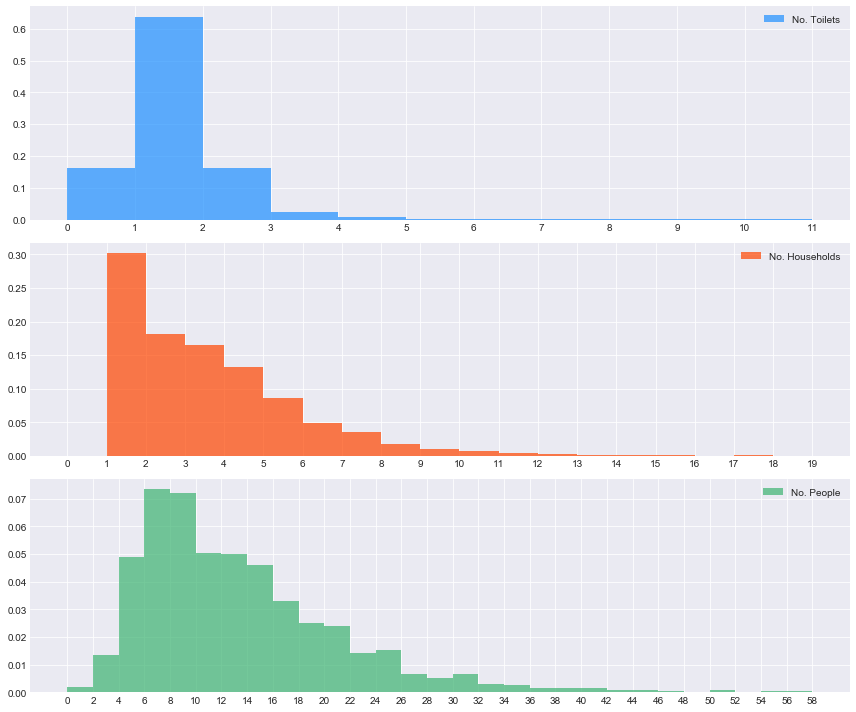

In [41]:
sns.set_style("darkgrid")

f, axes = plt.subplots(3,1,figsize=(12,10))

s2_agg.no_of_toilets.hist(bins=np.arange(0,12,1), ax=axes[0], normed=True, color="dodgerblue", alpha=0.7, label="No. Toilets")
axes[0].set_xticks(np.arange(0,12,1))
axes[0].legend()

s2_agg.no_of_hhs.hist(bins=np.arange(0,20,1), ax=axes[1], normed=True, color="orangered", alpha=0.7, label="No. Households")
axes[1].set_xticks(np.arange(0,20,1))
axes[1].legend()

s2_agg.no_of_ppl.hist(bins=np.arange(0,60,2), ax=axes[2], normed=True, color="mediumseagreen", alpha=0.7, label="No. People")
axes[2].set_xticks(np.arange(0,60,2))
axes[2].legend()

plt.tight_layout()